### Steps for spam detection model 
    1. Data cleaning
    2. EDA
    3. Text Preprocessing
    4. Model building
    5. Evaluation
    6. Improvement
    7. Website
    8. Deploy

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5572, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data cleaning

In [17]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [18]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [19]:
df.sample(5)

,target,text
1995,ham,Have you been practising your curtsey?
1487,ham,Hello lover! How goes that new job? Are you th...
1750,ham,DO NOT B LATE LOVE MUM
1340,ham,Every monday..nxt week vl be completing..
2043,ham,"Me not waking up until 4 in the afternoon, sup"


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.duplicated().sum()

np.int64(415)

In [23]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(5157, 2)

# EDA(Exploratory Data Analysis)

In [25]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

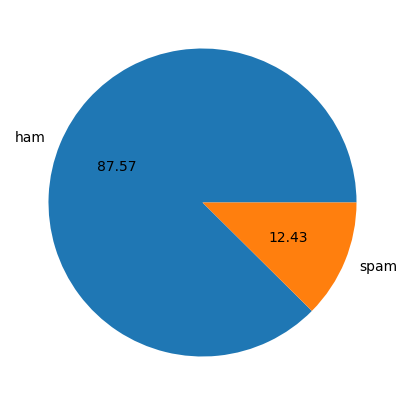

In [27]:
plt.figure(figsize=(6,5))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [28]:
# data imbalance

In [29]:
import nltk

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\evilk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df['num_char']=df['text'].apply(len)

In [32]:
df.sample(5)

,target,text,num_char
4957,0,Ahhhh...just woken up!had a bad dream about u ...,146
4754,1,Cashbin.co.uk (Get lots of cash this weekend!)...,155
4009,0,"Forgot you were working today! Wanna chat, but...",162
9,1,Had your mobile 11 months or more? U R entitle...,154
415,1,100 dating service cal;l 09064012103 box334sk38ch,49


In [33]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.sample(5)

,target,text,num_char,num_words
1963,1,it to 80488. Your 500 free text messages are v...,74,16
459,0,1.20 that call cost. Which i guess isnt bad. M...,79,22
4958,0,I'm vivek:)i got call from your number.,39,12
3824,0,Please protect yourself from e-threats. SIB ne...,159,27
2462,0,Anything lar...,15,3


In [35]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.sample(5)

,target,text,num_char,num_words,num_sentences
2823,1,ROMCAPspam Everyone around should be respondin...,152,28,2
5094,0,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",120,22,2
4068,1,You are being contacted by our Dating Service ...,148,28,2
4176,0,How are you doing. How's the queen. Are you go...,71,17,3
2127,0,You do got a shitload of diamonds though,40,8,1


In [37]:
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

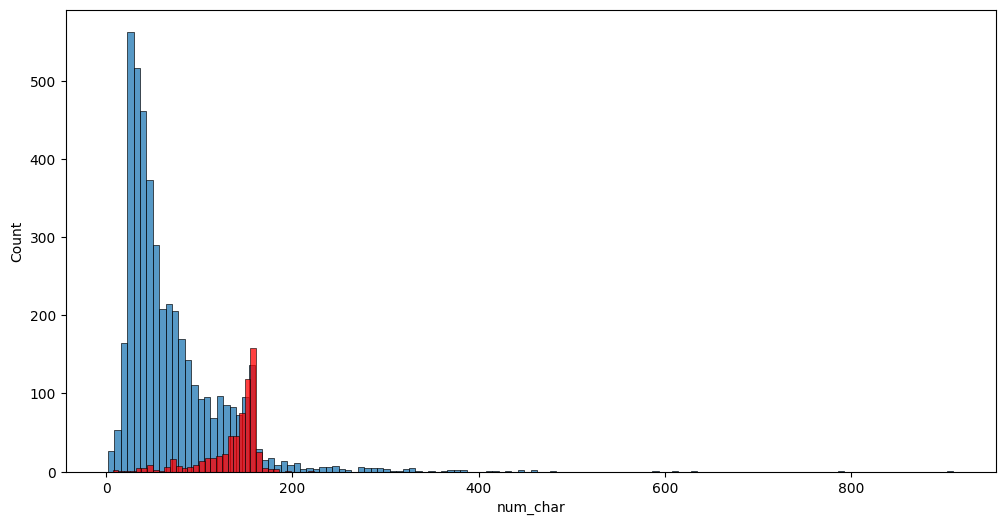

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='r')

<Axes: xlabel='num_words', ylabel='Count'>

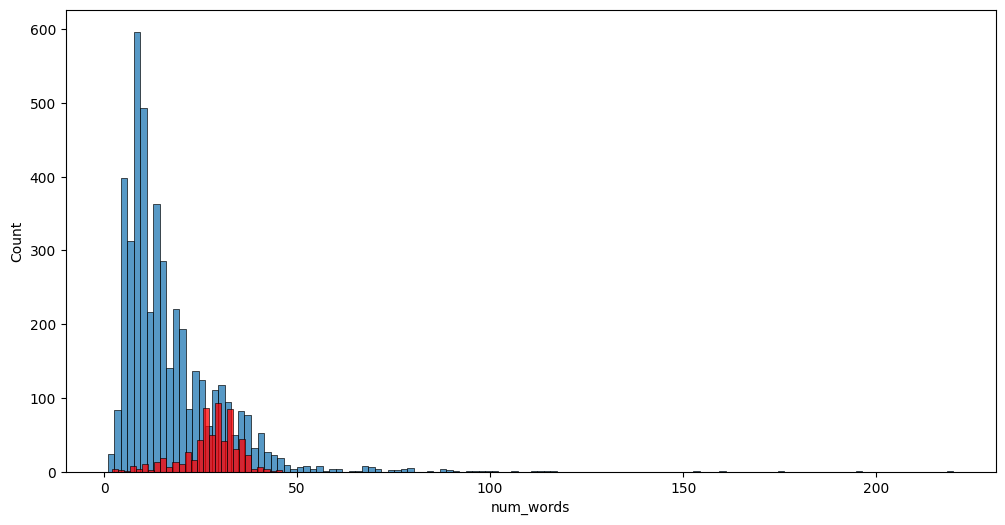

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

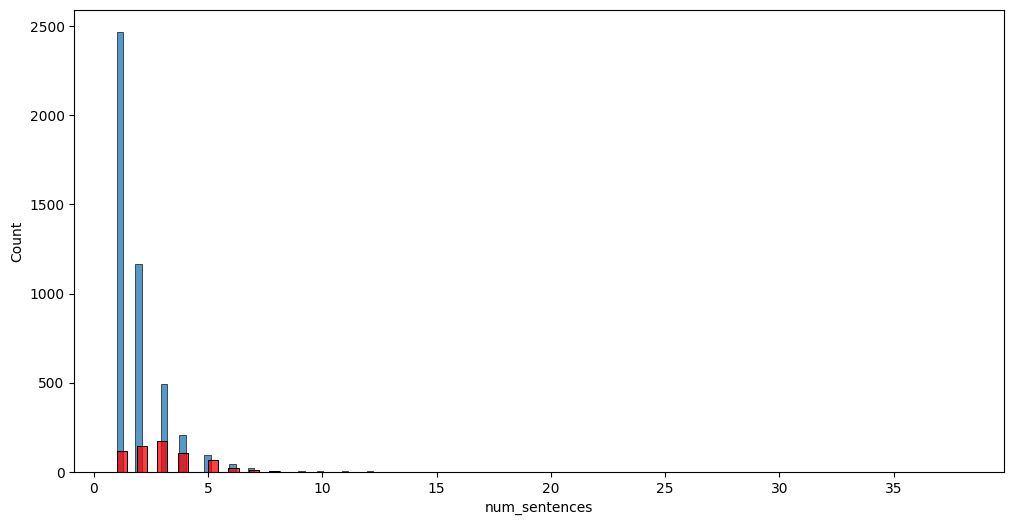

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

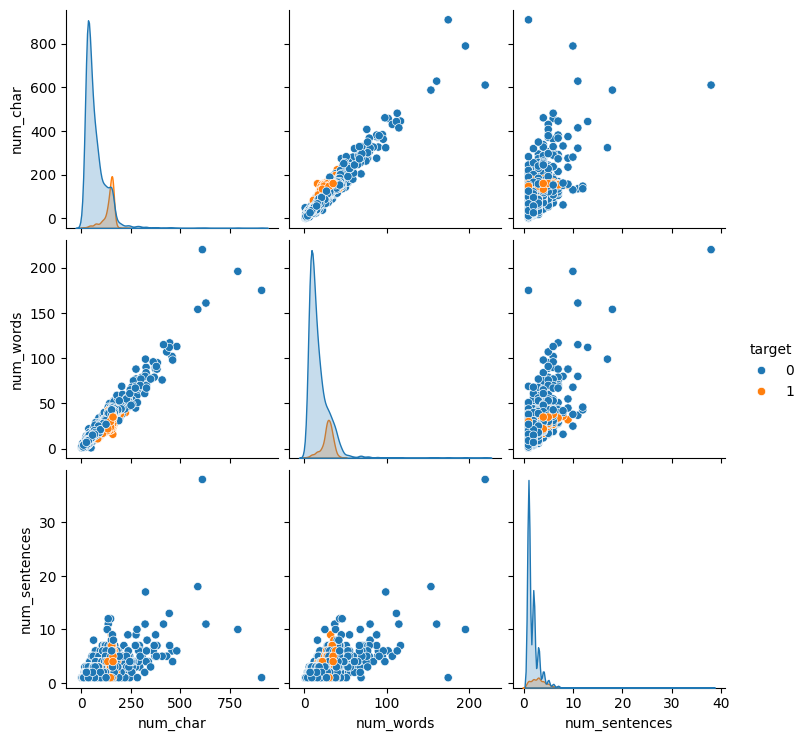

In [42]:
sns.pairplot(df,hue='target')

# Data Preprocessing

    Lower case
    Tokenization
    Removing special characters
    Removing stop words and punctuation
    Stemming



In [43]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evilk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [45]:
print(transform_text("Hello EVeryone"))

hello everyon


In [46]:
print(ps.stem('Having'))

have


In [47]:
df['transform_text']=df['text'].apply(transform_text)

In [48]:
df.sample(5)

,target,text,num_char,num_words,num_sentences,transform_text
2382,0,"Best line said in Love: . ""I will wait till th...",119,32,3,best line said love wait till day forget u day...
5397,0,That's necessarily respectful,29,4,1,necessarili respect
807,0,"sure, but make sure he knows we ain't smokin yet",48,12,1,sure make sure know ai smokin yet
5325,0,Gal n boy walking in d park. gal-can i hold ur...,160,43,5,gal n boy walk park hold ur hand u think would...
746,0,Dunno he jus say go lido. Same time 930.,40,11,2,dunno ju say go lido time 930


# Model building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [50]:
X=tfidf.fit_transform(df['transform_text']).toarray()
##X=cv.fit_transform(df['transform_text']).toarray()

In [51]:
X.shape

(5157, 3000)

In [52]:
y=df['target'].values

In [53]:
y.shape

(5157,)

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

 GaussianNB

In [58]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[786 119]
 [ 18 109]]
0.4780701754385965


MultinomialNB

In [59]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


BernoulliNB

In [60]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [61]:
#tf-idf ---> GaussianNB

# Evaluation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [63]:
lg=LogisticRegression()
mnb=MultinomialNB()
svc=SVC(kernel='sigmoid',gamma=1.0)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
bc=BaggingClassifier(n_estimators=50,random_state=2)


In [64]:
clfs={
    'lg':lg,
    'svc':svc,
    'mnb':mnb,
    'rfc':rfc,
    'knc':knc,
    'dtc':dtc,
    'bc':bc
}

In [65]:
def train_classifier(clfs,X_train,y_train,X_test,y_test):
    clfs.fit(X_train,y_train)
    y_pred=clfs.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For lg
Accuracy - 0.9593023255813954
Precision - 0.967032967032967
For svc
Accuracy - 0.9777131782945736
Precision - 0.9905660377358491
For mnb
Accuracy - 0.9718992248062015
Precision - 1.0
For rfc
Accuracy - 0.9718992248062015
Precision - 1.0
For knc
Accuracy - 0.9127906976744186
Precision - 1.0
For dtc
Accuracy - 0.936046511627907
Precision - 0.8144329896907216
For bc
Accuracy - 0.9612403100775194
Precision - 0.8918918918918919


In [67]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
2,mnb,0.971899,1.000000
4,knc,0.912791,1.000000
3,rfc,0.971899,1.000000
1,svc,0.977713,0.990566
0,lg,0.959302,0.967033
6,bc,0.961240,0.891892
5,dtc,0.936047,0.814433


In [69]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [70]:
performance_df1

,Algorithm,variable,value
0,mnb,Accuracy,0.971899
1,knc,Accuracy,0.912791
2,rfc,Accuracy,0.971899
3,svc,Accuracy,0.977713
4,lg,Accuracy,0.959302
5,bc,Accuracy,0.961240
6,dtc,Accuracy,0.936047
7,mnb,Precision,1.000000
8,knc,Precision,1.000000
9,rfc,Precision,1.000000


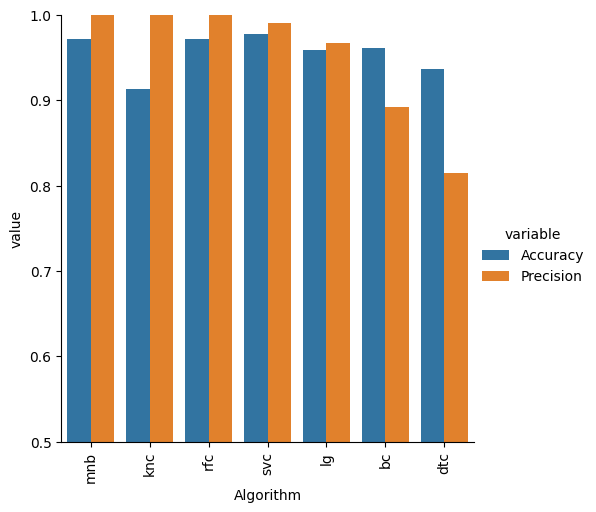

In [71]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


### Voting Classifier

In [78]:
from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('mnb',mnb),('knc',knc),('rfc',rfc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

,estimators,"[('mnb', ...), ('knc', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None
,n_neighbors,5


In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9573643410852714
Precision 1.0


In [82]:
from sklearn.ensemble import StackingClassifier
estimators=[('knc', knc), ('mnb', mnb), ('rfc',rfc)]
final_estimator=RandomForestClassifier()
stacking= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [83]:
stacking.fit(X_train,y_train)
y_pred = stacking.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9576271186440678


So here MultinomialNB have best accuracy and precision value

In [84]:
import pickle

In [85]:
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("Model.pkl",'wb'))